In [1]:
pip install datasets


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.9/388.9 kB 6.5 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


In [2]:
from datasets import load_dataset

dataset = load_dataset("surrey-nlp/PLOD-CW")
train_dataset = dataset["train"]
val_dataset = dataset["validation"]
test_dataset = dataset["test"]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/1072 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/126 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/153 [00:00<?, ? examples/s]

In [3]:
print(dataset["train"].features)


{'tokens': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None), 'pos_tags': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None), 'ner_tags': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None)}


In [4]:
def extract_tokens_and_ner(data):
    tokens = []
    ner_labels = []
    for example in data:
        tokens.extend(example['tokens'])
        ner_labels.extend(example['ner_tags'])  # Adjust the key if needed
    return tokens, ner_labels

train_tokens, train_ner_labels = extract_tokens_and_ner(train_dataset)
val_tokens, val_ner_labels = extract_tokens_and_ner(val_dataset)
test_tokens, test_ner_labels = extract_tokens_and_ner(test_dataset)


In [5]:
from collections import Counter

train_token_counts = Counter(train_tokens)
train_ner_counts = Counter(train_ner_labels)


test_token_counts = Counter(test_tokens)
test_ner_counts = Counter(test_ner_labels)


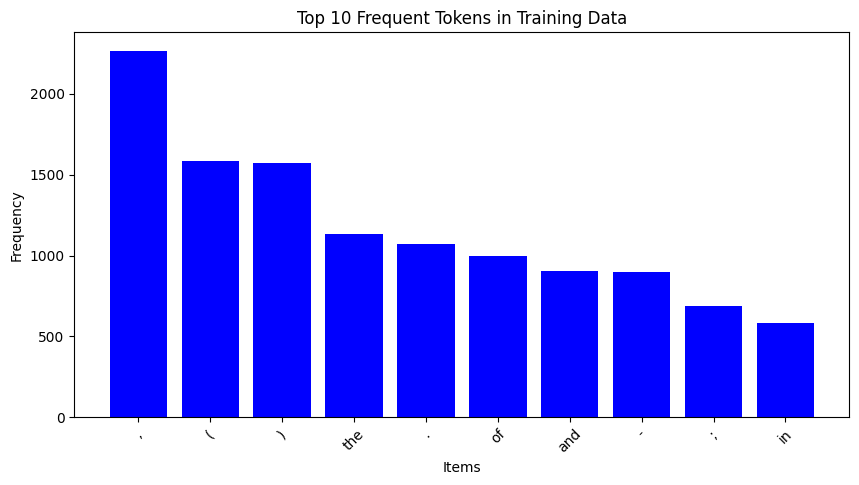

In [6]:
import matplotlib.pyplot as plt

# Example for plotting token frequencies
def plot_frequency(data, title):
    items = data.most_common(10)  # Top 10 most common items
    words, counts = zip(*items)
    plt.figure(figsize=(10, 5))
    plt.bar(words, counts, color='blue')
    plt.xlabel('Items')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

plot_frequency(train_token_counts, 'Top 10 Frequent Tokens in Training Data')


# Test data

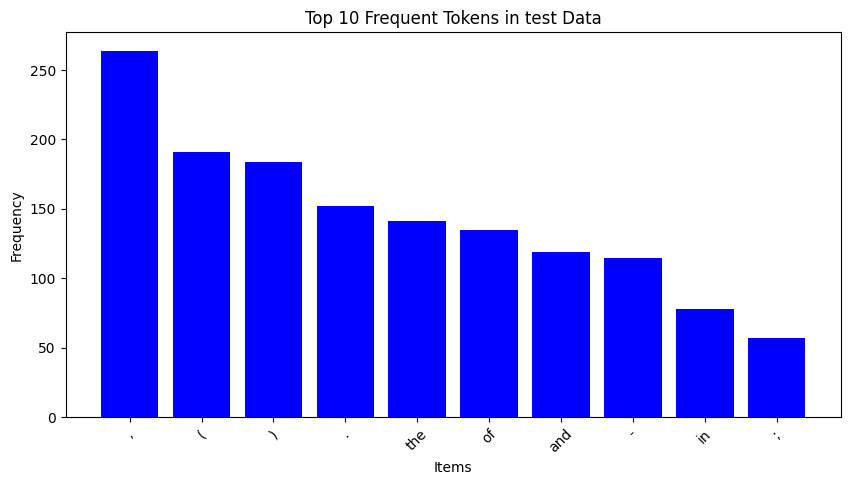

In [7]:
def plot_frequency(data, title):
    items = data.most_common(10)  # Top 10 most common items
    words, counts = zip(*items)
    plt.figure(figsize=(10, 5))
    plt.bar(words, counts, color='blue')
    plt.xlabel('Items')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

plot_frequency(test_token_counts, 'Top 10 Frequent Tokens in test Data')

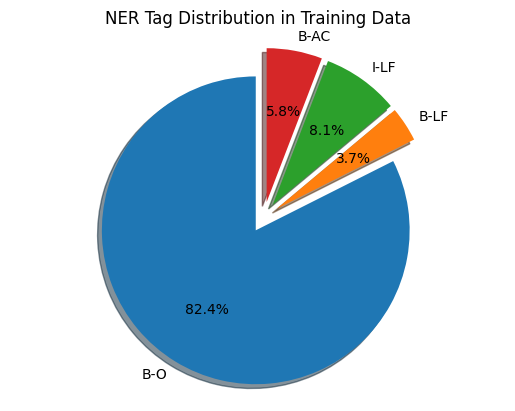

In [8]:
from collections import Counter

# train_ner_labels contains NER labels from the train dataset
ner_counts = Counter(train_ner_labels)
import matplotlib.pyplot as plt

# Prepare data
labels, sizes = zip(*ner_counts.items())
explode = (0.1,) * len(labels)  # only "explode" the 1st slice (i.e. 'H')

# Plot
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('NER Tag Distribution in Training Data')
plt.show()


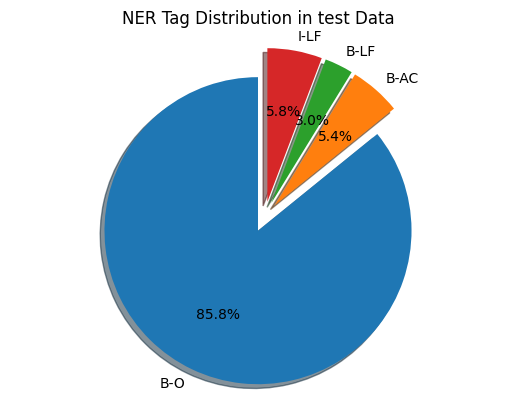

In [9]:
from collections import Counter

# train_ner_labels contains NER labels from the train dataset
ner_counts = Counter(test_ner_labels)
import matplotlib.pyplot as plt

# Prepare data
labels, sizes = zip(*ner_counts.items())
explode = (0.1,) * len(labels)  # only "explode" the 1st slice (i.e. 'H')

# Plot
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('NER Tag Distribution in test Data')
plt.show()


In [10]:
pip install wordcloud

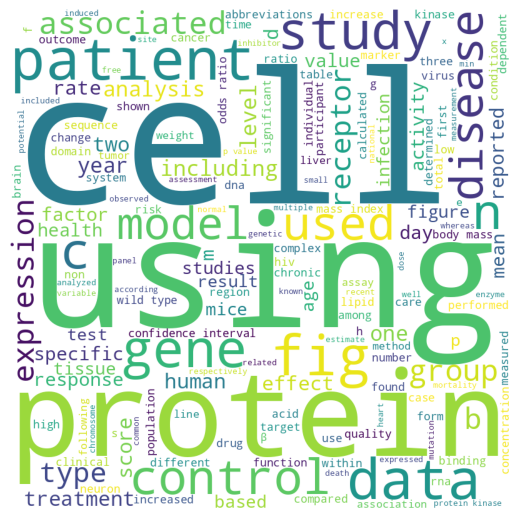

In [12]:
import string
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Flatten the list of tokens
tokens = [token for example in train_dataset for token in example['tokens']]

# Remove punctuation and stop words, and convert to lowercase
table = str.maketrans('', '', string.punctuation)
processed_tokens = [token.lower().translate(table) for token in tokens if token.lower() not in STOPWORDS]

# Optional: You might want to filter out any 'tokens' that are now empty strings or unwanted characters
processed_tokens = [token for token in processed_tokens if token and token.isalpha()]

# Join tokens into a single string for word cloud generation
text = ' '.join(processed_tokens)

# Generate word cloud
wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      stopwords=STOPWORDS,
                      min_font_size=10).generate(text)

# Display the word cloud
plt.figure(figsize=(5, 5), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


In [13]:
# Assuming 'train_dataset' is loaded and contains tokenized text entries
text_lengths = [len(example['tokens']) for example in train_dataset]
from collections import Counter
length_counts = Counter(text_lengths)


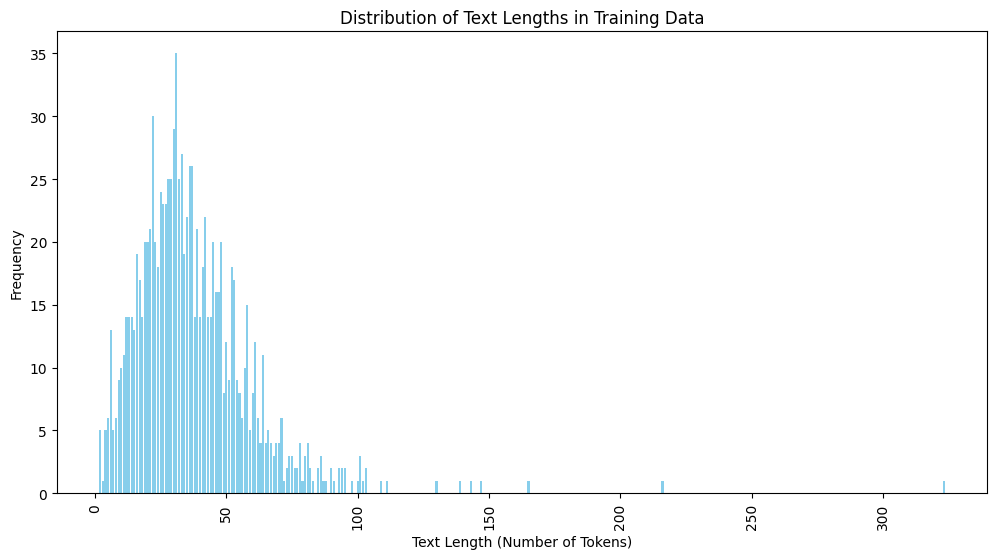

In [14]:
import matplotlib.pyplot as plt

# Extracting lengths and their corresponding frequencies
lengths = list(length_counts.keys())
frequencies = list(length_counts.values())

# Sorting the lengths to make the plot orderly
sorted_indices = sorted(range(len(lengths)), key=lambda k: lengths[k])
sorted_lengths = [lengths[i] for i in sorted_indices]
sorted_frequencies = [frequencies[i] for i in sorted_indices]

# Creating the bar graph
plt.figure(figsize=(12, 6))
plt.bar(sorted_lengths, sorted_frequencies, color='skyblue')
plt.xlabel('Text Length (Number of Tokens)')
plt.ylabel('Frequency')
plt.title('Distribution of Text Lengths in Training Data')
plt.xticks(rotation=90)
plt.show()


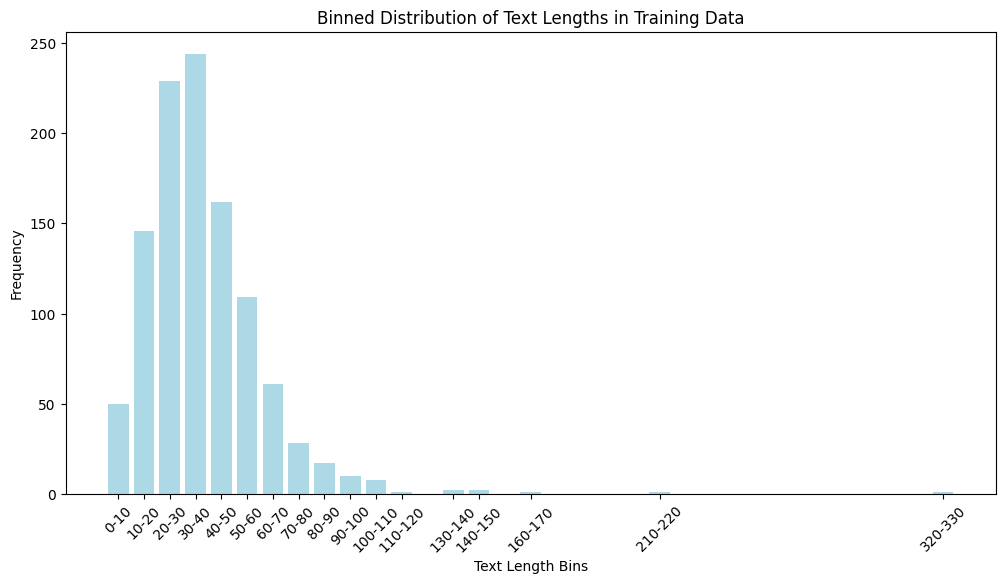

In [15]:
import numpy as np

# Define bins
bin_ranges = np.arange(0, max(text_lengths) + 10, 10)  # Adjust the bin size as needed

# Use numpy to bin the data
binned_lengths = np.digitize(text_lengths, bins=bin_ranges)

# Count frequencies in bins
binned_frequency = Counter(binned_lengths)

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(binned_frequency.keys(), binned_frequency.values(), color='lightblue')
plt.xlabel('Text Length Bins')
plt.ylabel('Frequency')
plt.title('Binned Distribution of Text Lengths in Training Data')
plt.xticks(ticks=list(binned_frequency.keys()), labels=[f"{bin_ranges[i-1]}-{bin_ranges[i]}" for i in binned_frequency.keys()], rotation=45)
plt.show()


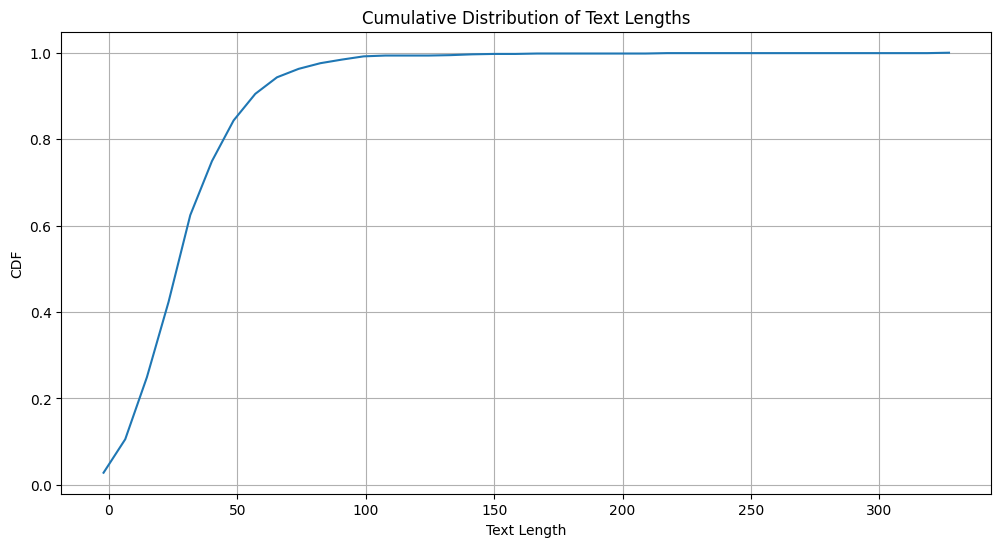

In [16]:
from scipy.stats import cumfreq

# Generate cumulative frequency data
res = cumfreq(text_lengths, numbins=40)  # Adjust the number of bins as needed

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(res.lowerlimit + np.linspace(0, res.binsize*res.cumcount.size, res.cumcount.size), res.cumcount/res.cumcount.max())
plt.xlabel('Text Length')
plt.ylabel('CDF')
plt.title('Cumulative Distribution of Text Lengths')
plt.grid(True)
plt.show()


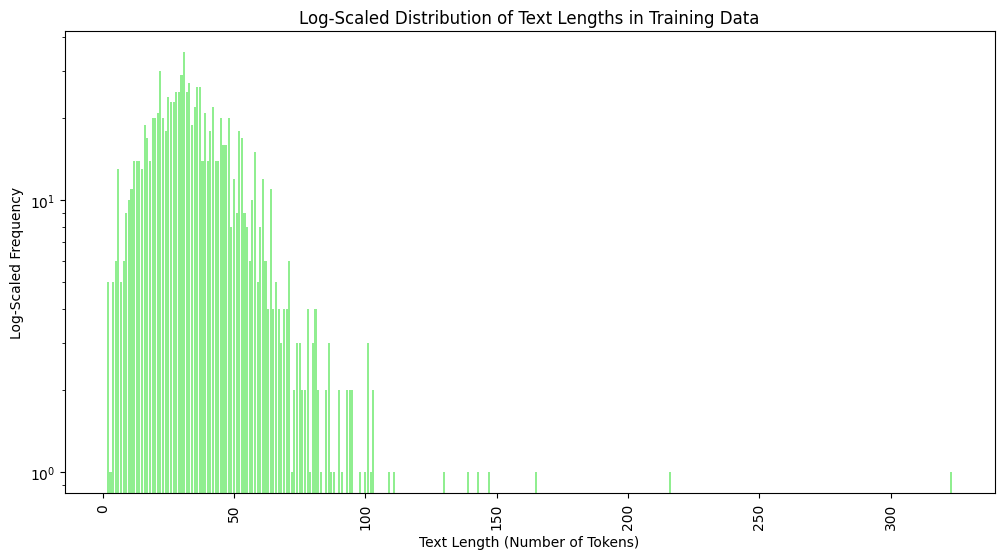

In [17]:
plt.figure(figsize=(12, 6))
plt.bar(sorted_lengths, sorted_frequencies, log=True, color='lightgreen')
plt.xlabel('Text Length (Number of Tokens)')
plt.ylabel('Log-Scaled Frequency')
plt.title('Log-Scaled Distribution of Text Lengths in Training Data')
plt.xticks(rotation=90)
plt.show()


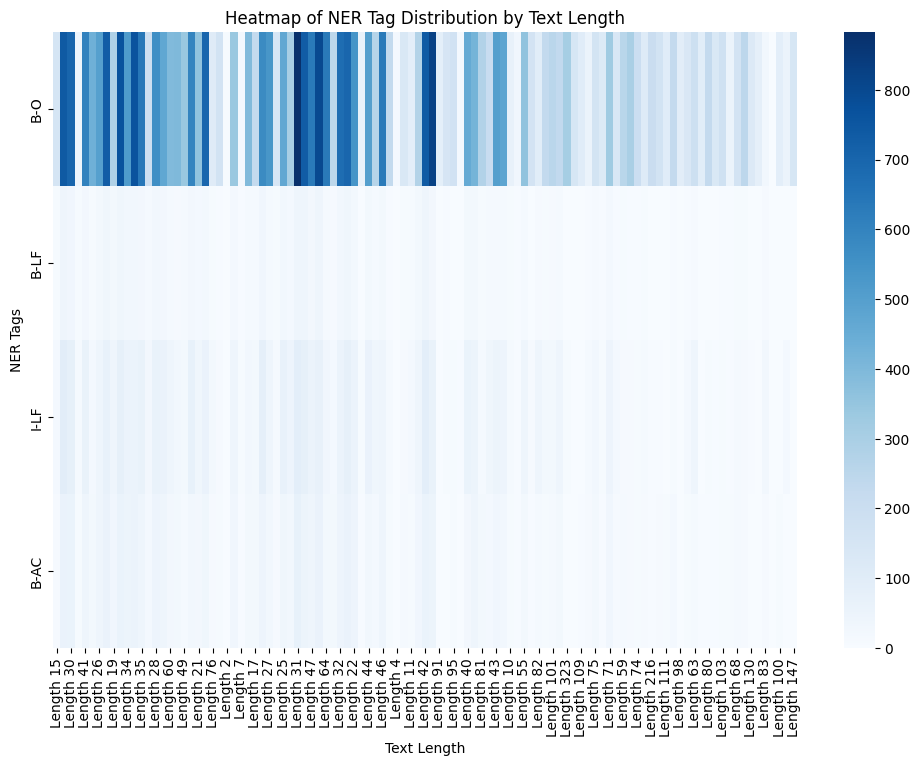

In [22]:
data = {
    'text_length': [len(entry['tokens']) for entry in train_dataset],
    'ner_tags': [entry['ner_tags'] for entry in train_dataset]
}

df = pd.DataFrame(data)

# Aggregate NER tag counts by text length
def aggregate_ner_counts(tags):
    # Assume NER tags are integers and map to names if needed
    return Counter(tags)

df['ner_counts'] = df['ner_tags'].apply(aggregate_ner_counts)

# Convert list of Counters into a DataFrame where each column is a text length and each row an NER tag
summary = {}
for index, row in df.iterrows():
    for key, value in row['ner_counts'].items():
        if key not in summary:
            summary[key] = {}
        if row['text_length'] not in summary[key]:
            summary[key][row['text_length']] = 0
        summary[key][row['text_length']] += value

ner_tag_df = pd.DataFrame(summary).fillna(0).transpose()
ner_tag_df.columns = [f"Length {col}" for col in ner_tag_df.columns]

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(ner_tag_df, annot=False, cmap='Blues')  # Set annot=True for actual counts
plt.title('Heatmap of NER Tag Distribution by Text Length')
plt.xlabel('Text Length')
plt.ylabel('NER Tags')
plt.show()